In [1]:
#@title 1.1. Classes e funções
import sys
sys.path.append('/home/ABTLUS/victor.secco/data_processing') 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from mypackages.eRDF import butter_lowpass_filter, DataProcessor
from tqdm import tqdm 
from mypackages.edp_processing import peak_calibration

from matplotlib import rcParams, cycler
from matplotlib.ticker import AutoMinorLocator


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 22
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (6.4,4.8),
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,
                 "xtick.minor.size"     : 3.5,
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 3,
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})



The calculated calibration factor ds: 0.00743649587727647


'/home/ABTLUS/victor.secco/data_processing/ED_data/Fe3O4/Maghemite/Fe2O3_oleyl/ROIS/iq_Fe2O3_oleyl.csv'

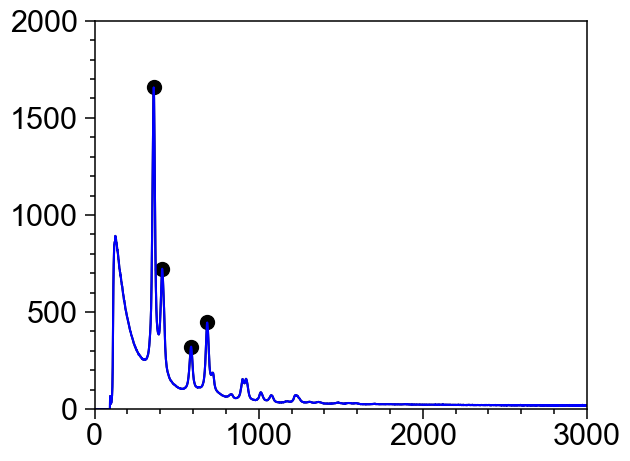

In [2]:
#gold peak calibration
from scipy.signal import find_peaks

path = '/home/ABTLUS/victor.secco/data_processing/ED/Au/Au_13_jun_24/Au_inicio/'

#end_name = 'Au_end.csv'
start_name = 'Au_start.csv'

df1 = pd.read_csv(os.path.join(path, start_name), header = None)
#df2 = pd.read_csv(os.path.join(path, end_name), header = None)

data_start = df1[0].values
#data_end = df2[0].values

peaks_start, _ = find_peaks(data_start, distance = 40, height=300)
#peaks_end, _ = find_peaks(data_end, distance = 40, height=500)



calibration = peak_calibration(pixel_positions = peaks_start[3:7])
#calibration_end = peak_calibration(pixel_positions = peaks_end[1:5])

#calibration = (calibration_start +calibration_end)/2

#peaks_end, _ = find_peaks(data_end, distance = 1, height=500)

plt.plot(data_start)
plt.plot(df1[0].values)
plt.scatter(peaks_start[3:7], data_start[peaks_start[3:7]])
plt.show

"/home/ABTLUS/victor.secco/data_processing/ED_data/Fe3O4/Maghemite/Fe2O3_oleyl/ROIS/iq_Fe2O3_oleyl.csv"

FileNotFoundError: [Errno 2] No such file or directory: '/home/ABTLUS/victor.secco/data_processing/ED_data/CdSe_ePDF/L2_CdSe/Stacked/cdse.png'

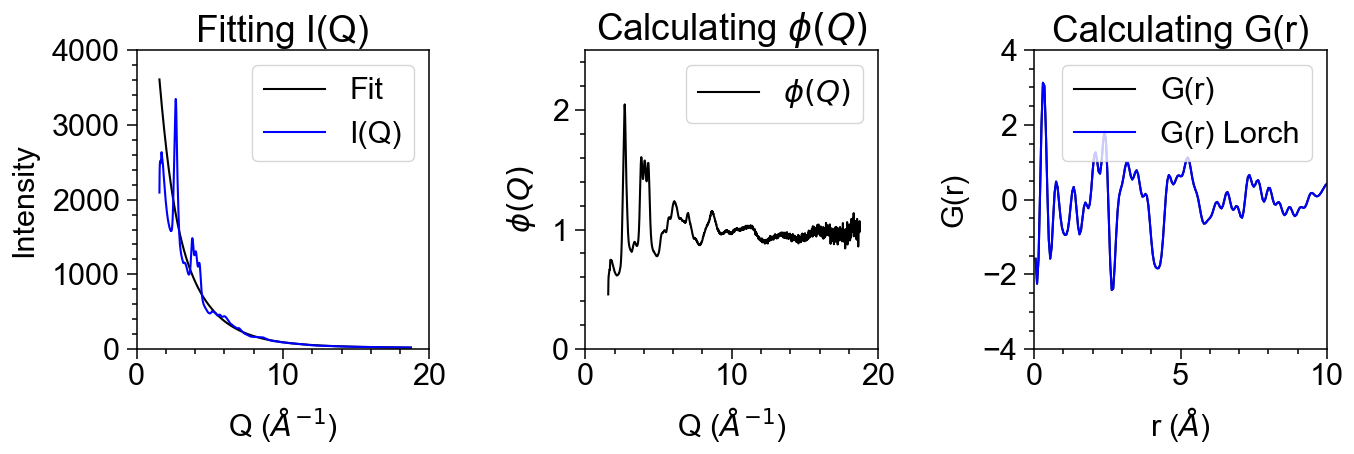

In [7]:
#Gr generation
lobato_path = '/home/ABTLUS/victor.secco/data_processing/ED/Lobato_2014.txt'

ds = (calibration)/(2*math.pi) #AuNPs

CdSe =  {1: [34, 1], 2: [48, 1],}
Magnetite = {1: [26, 3], 2: [8, 4],}

path = '/home/ABTLUS/victor.secco/data_processing/ED/CdSe_ePDF/W1/Jun_2024/'
df1 = pd.read_csv(os.path.join(path, 'ROI1.csv'), header=None)

raw_data = df1[0].values
start = int(raw_data.shape[0]*0.03)
end =  int(raw_data.shape[0]*0.8)


dp1 = DataProcessor(raw_data, 0.893, lobato_path, start, end, ds, Magnetite, region = 0.3)
 

_iq = dp1.iq
_sq, _fq = dp1.calculate_SQ_PhiQ(_iq, 0)
_fq_filtered = butter_lowpass_filter(_fq, fs = 50.0, cutoff = 2.0, order = 3)
_r, _Gr = dp1.calculate_Gr(_fq, rmax=80, dr=0.05)

_Gr_Lorch, _ = dp1.low_r_correction(_Gr, 0.025, _r, r_cut = 2)


dp1.plot_results(_sq, _fq, _Gr, _r, _Gr, 0)


In [ ]:
input_path = "/home/ABTLUS/victor.secco/data_processing/ED_data/Fe3O4/Maghemite/Fe2O3_OAm/ROIS/iq_fe2o3_oam.csv"
df = pd.read_csv(input_path)
output_path = "/home/ABTLUS/victor.secco/data_processing/EXP2PDF/DATA/fe2o3/oam"


roi = pd.DataFrame(np.array([dp1.q, _fq]).T)
roi.to_csv(os.path.join(output_path,("fe2o3_oam_roi_"+i+".csv")), index = None, sep = "\t")

In [ ]:
norm_data = iq[start:end] / (dp1.N * dp1.fq_sq)
norm_data = norm_data * dp1.q

# Fit the polynomial
degree = 9
coefficients = np.polyfit(dp1.q, norm_data, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial fit
x_fit = np.linspace(dp1.q.min(), dp1.q.max(), len(norm_data))
y_fit = polynomial(x_fit)

# Calculate _fq_poly
_fq_poly = norm_data - y_fit


plt.plot(_fq_poly)

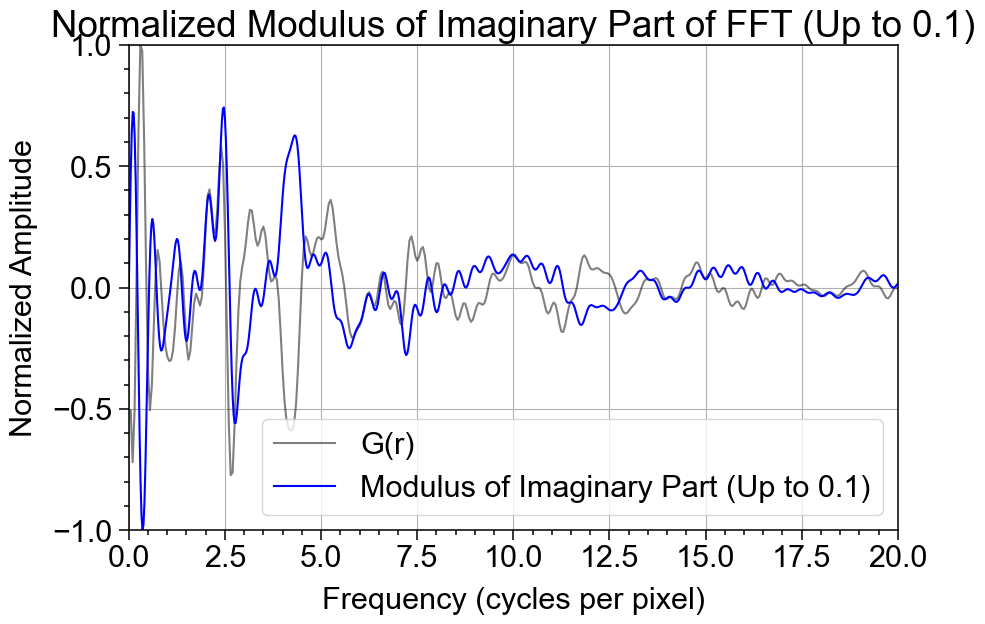

In [14]:

# Zero-padding length
padded_length = 33064  # Adjust padding as needed
padded_profile = np.pad(_fq, (0, padded_length - len(_fq)), 'constant')

# Perform FFT
padded_fourier_transform = np.fft.fft(padded_profile)
padded_frequencies = np.fft.fftfreq(len(padded_profile))

# Extract imaginary part and its modulus
imaginary_part = np.imag(padded_fourier_transform)


# Filter frequencies up to 0.1
mask = (padded_frequencies >= 0) & (padded_frequencies <= 0.07)
filtered_frequencies = padded_frequencies[mask]
normalized_imaginary_part = imaginary_part / np.max(np.abs(imaginary_part))
filtered_imaginary_part = normalized_imaginary_part[mask]



normalized_Gr = _Gr / np.max(np.abs(_Gr))

# Plot the modulus of the imaginary part up to frequency 0.1
plt.figure(figsize=(10, 6))
plt.plot(_r, normalized_Gr, label="G(r)", alpha=0.5)
plt.xlim(0,20)  # Original data for context
plt.plot(filtered_frequencies*842.7566948843412, filtered_imaginary_part, label="Modulus of Imaginary Part (Up to 0.1)", linestyle="-")
plt.xlabel('Frequency (cycles per pixel)')
plt.ylabel('Normalized Amplitude')
plt.title('Normalized Modulus of Imaginary Part of FFT (Up to 0.1)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Zero-padding length
padded_length = 32768  # Total length after padding
pad_total = padded_length - len(_fq_poly)  # Total padding to add
pad_before = pad_total // 2  # Padding before the signal
pad_after = pad_total - pad_before  # Padding after the signal

# Symmetrically zero-pad the signal
padded_profile = np.pad(_fq_poly, (pad_before, pad_after), 'constant')

# Custom FFT function (Discrete Fourier Transform)
def custom_fft(signal):
    N = len(signal)
    result = np.zeros(N, dtype=complex)  # Initialize the output array
    for k in range(N):  # For each frequency
        result[k] = np.sum(signal * np.exp(-2j * np.pi * k * np.arange(N) / N))
    return result

# Perform the custom FFT
padded_fourier_transform = custom_fft(padded_profile)
padded_frequencies = np.fft.fftfreq(len(padded_profile))  # Use numpy for frequency axis

# Extract imaginary part and normalize it
imaginary_part = np.imag(padded_fourier_transform)
normalized_imaginary_part = imaginary_part / np.max(np.abs(imaginary_part))

# Filter frequencies up to 0.05
mask = (padded_frequencies >= 0) & (padded_frequencies <= 0.05)
filtered_frequencies = padded_frequencies[mask]
filtered_imaginary_part = normalized_imaginary_part[mask]

# Find peaks in the normalized imaginary part
peaks, properties = find_peaks(filtered_imaginary_part, height=0, prominence=0.01)

# Plot the normalized imaginary part with peaks highlighted
plt.figure(figsize=(10, 6))
plt.plot(filtered_frequencies, filtered_imaginary_part, label="Normalized Imaginary Part (Up to 0.05)", linestyle="-")
plt.scatter(filtered_frequencies[peaks], filtered_imaginary_part[peaks], color='red', label="Peaks")
plt.xlabel('Frequency (cycles per pixel)')
plt.ylabel('Normalized Imaginary Amplitude')
plt.title('Peaks in the Normalized Imaginary Part of Custom FFT (Symmetrical Padding)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Use fftshift for visualization
padded_frequencies = np.fft.fftfreq(len(padded_profile))
shifted_frequencies = np.fft.fftshift(padded_frequencies)
shifted_fourier_transform = np.fft.fftshift(padded_fourier_transform)

mask = (padded_frequencies >= -0.07) & (padded_frequencies <= 0.07)
filtered_frequencies = padded_frequencies[mask]
normalized_imaginary_part = imaginary_part / np.max(np.abs(imaginary_part))

# Plot the real and imaginary parts for visualization
plt.plot(filtered_frequencies, np.imag(shifted_fourier_transform), label="Imaginary Part")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Shifted FFT with Frequency Centered")
plt.grid(True)
plt.legend()
plt.show()


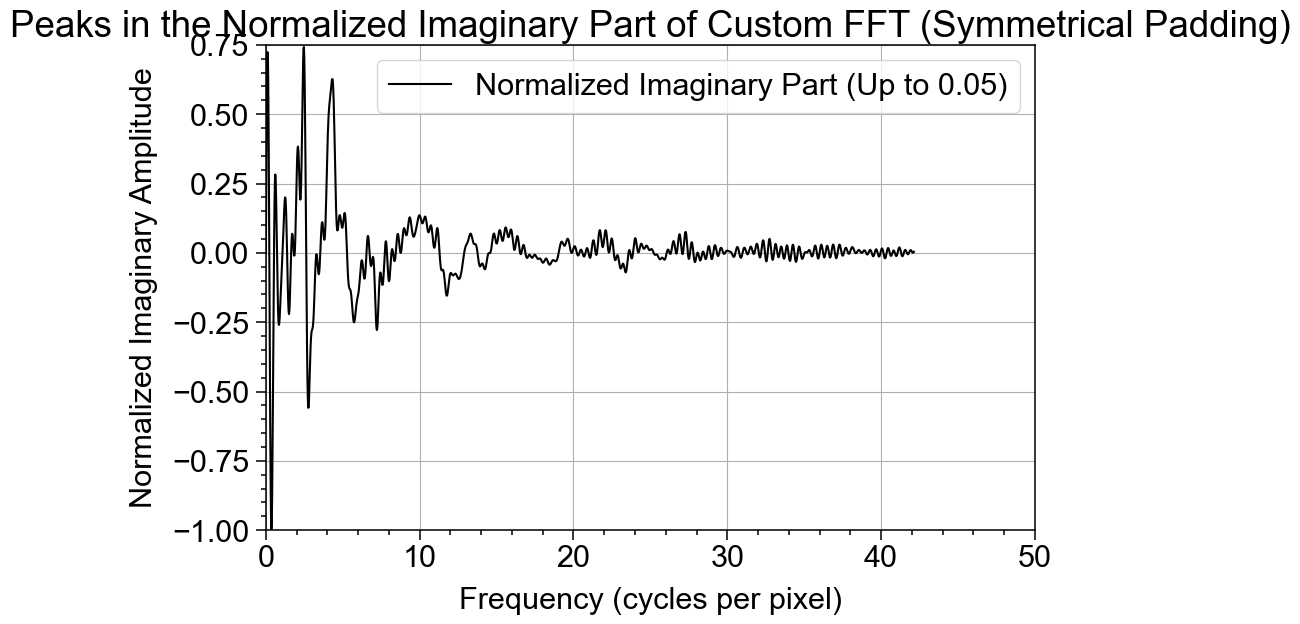

In [ ]:
padded_length = 33064  # Adjust padding as needed
padded_profile = np.pad(_fq, (0, padded_length - len(_fq)), 'constant')

# Custom FFT function (Discrete Fourier Transform)
def custom_fft(signal):
    N = len(signal)
    result = np.zeros(N, dtype=complex)  # Initialize the output array
    for k in range(N):  # For each frequency
        result[k] = np.sum(signal * np.exp(-2j * np.pi * k * np.arange(N) / N))
    return result

# Perform the custom FFT
padded_fourier_transform = custom_fft(padded_profile)
padded_frequencies = np.fft.fftfreq(len(padded_profile))  # Use numpy for frequency axis

# Extract imaginary part and normalize it
imaginary_part = np.imag(padded_fourier_transform)
normalized_imaginary_part = imaginary_part / np.max(np.abs(imaginary_part))

# Filter frequencies up to 0.05
mask = (padded_frequencies >= 0) & (padded_frequencies <= 0.05)
filtered_frequencies = padded_frequencies[mask]
filtered_imaginary_part = normalized_imaginary_part[mask]

# Find peaks in the normalized imaginary part
peaks, properties = find_peaks(filtered_imaginary_part, height=0, prominence=0.01)



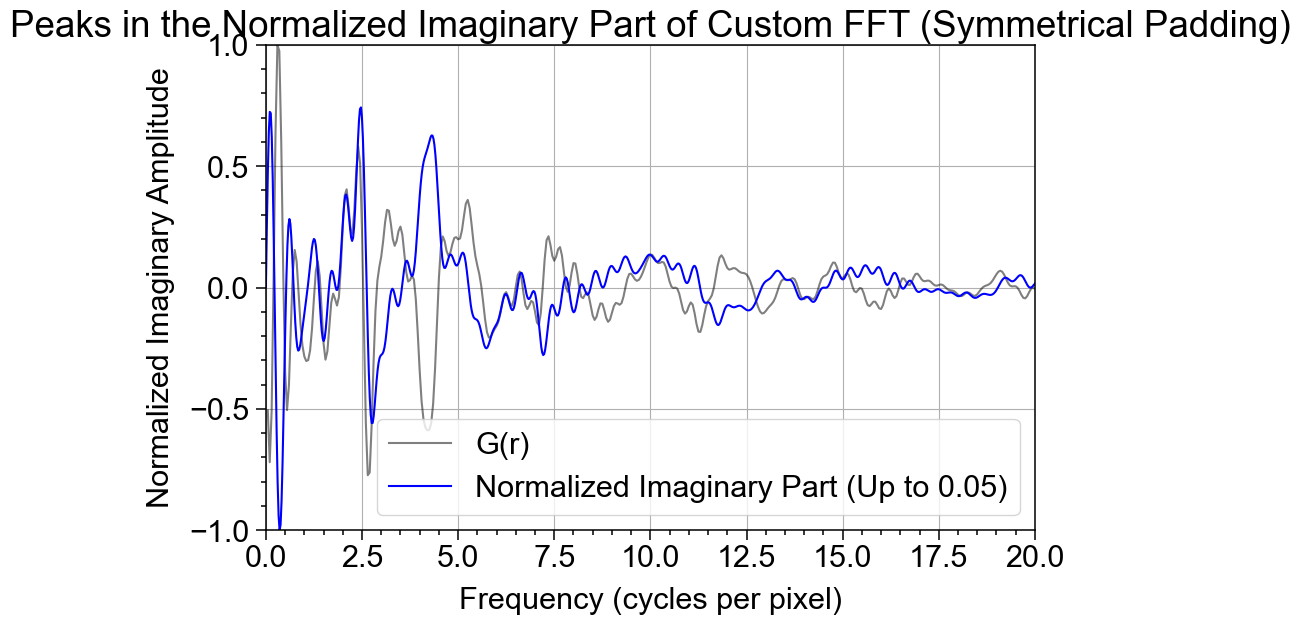

In [19]:

# Plot the normalized imaginary part with peaks highlighted
plt.figure(figsize=(10, 6))
plt.plot(_r, normalized_Gr, label="G(r)", alpha=0.5)
plt.xlim(0,20)  # Original data for context
plt.plot(filtered_frequencies*842.7566948843412, filtered_imaginary_part, label="Normalized Imaginary Part (Up to 0.05)", linestyle="-")
#plt.scatter(filtered_frequencies[peaks], filtered_imaginary_part[peaks], color='red', label="Peaks")
plt.xlabel('Frequency (cycles per pixel)')
plt.ylabel('Normalized Imaginary Amplitude')
plt.title('Peaks in the Normalized Imaginary Part of Custom FFT (Symmetrical Padding)')
plt.legend()
plt.grid(True)
plt.show()

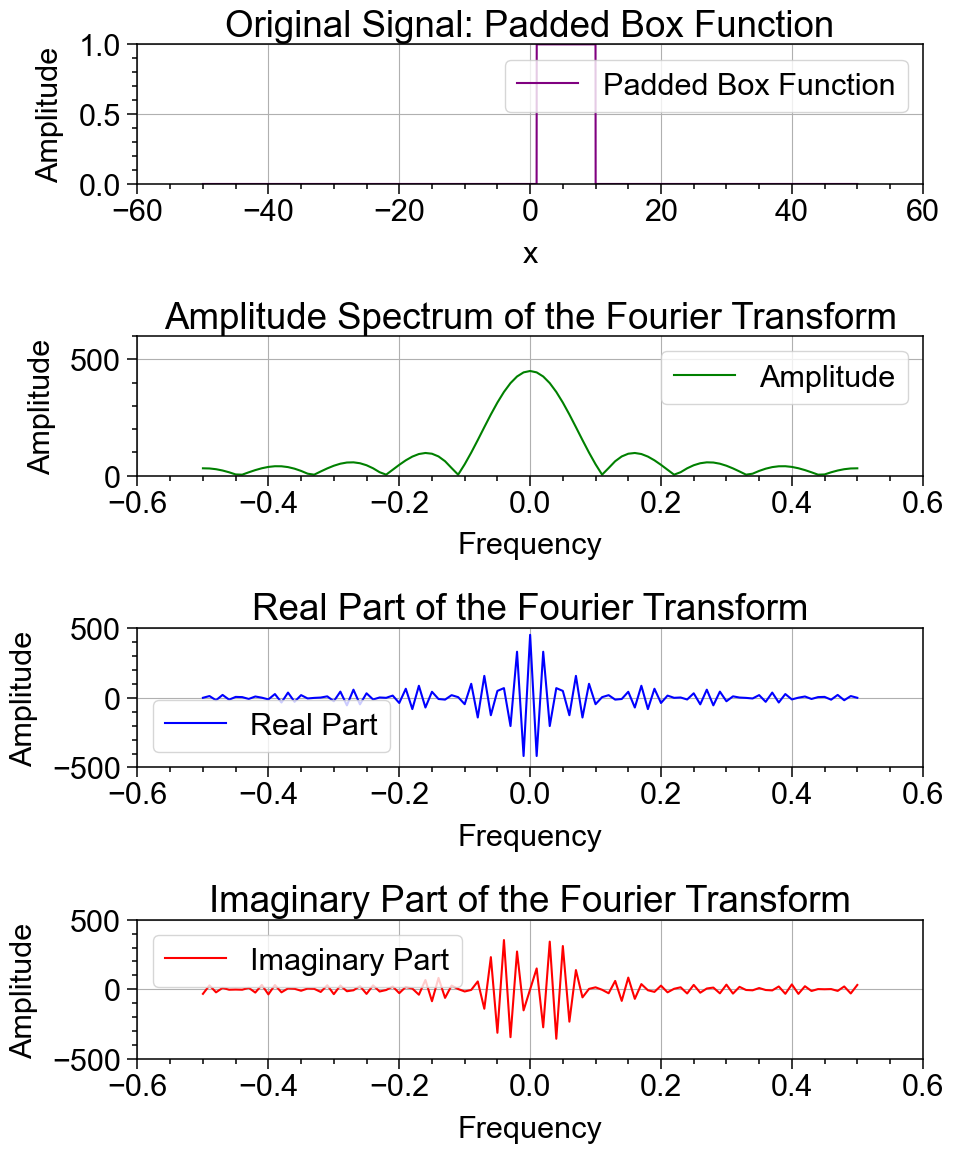

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.linspace(-25, 25, 1000)  # x-axis range from -25 to 25 with 1000 points

# Define the box function
box_width = 75  # Width of the box
box_function = np.where((x >= 2.5) & (x <= box_width), 1, 0)  # Box from x=0 to x=box_width

# Pad the signal symmetrically
pad_length = 4000  # Total padding length
pad_before = pad_length // 2
pad_after = pad_length - pad_before

padded_box_function = np.pad(box_function, (pad_before, pad_after), 'constant')

# Define the padded domain
padded_x = np.linspace(-50, 50, len(padded_box_function))  # Adjusted x-axis for padded signal

# Perform the Fourier Transform
padded_ft = np.fft.fft(padded_box_function)
frequencies = np.fft.fftfreq(len(padded_box_function), d=(padded_x[1] - padded_x[0]))
padded_ft_shifted = np.fft.fftshift(padded_ft)  # Shift for symmetry
frequencies_shifted = np.fft.fftshift(frequencies)

# Extract components
amplitude = np.abs(padded_ft_shifted)  # Amplitude spectrum
real_part = np.real(padded_ft_shifted)  # Real part
imaginary_part = np.imag(padded_ft_shifted)  # Imaginary part

# Limit the frequency axis to [-0.5, 0.5]
freq_mask = (frequencies_shifted >= -0.5) & (frequencies_shifted <= 0.5)
frequencies_limited = frequencies_shifted[freq_mask]
amplitude_limited = amplitude[freq_mask]
real_part_limited = real_part[freq_mask]
imaginary_part_limited = imaginary_part[freq_mask]

# Plot the results
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Subplot 1: Original padded signal
axs[0].plot(padded_x, padded_box_function, color='purple', label="Padded Box Function")
axs[0].set_title("Original Signal: Padded Box Function")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)
axs[0].legend()

# Subplot 2: Amplitude spectrum (limited to [-0.5, 0.5])
axs[1].plot(frequencies_limited, amplitude_limited, color='green', label="Amplitude")
axs[1].set_title("Amplitude Spectrum of the Fourier Transform")
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Amplitude")
axs[1].grid(True)
axs[1].legend()

# Subplot 3: Real part (limited to [-0.5, 0.5])
axs[2].plot(frequencies_limited, real_part_limited, color='blue', label="Real Part")
axs[2].set_title("Real Part of the Fourier Transform")
axs[2].set_xlabel("Frequency")
axs[2].set_ylabel("Amplitude")
axs[2].grid(True)
axs[2].legend()

# Subplot 4: Imaginary part (limited to [-0.5, 0.5])
axs[3].plot(frequencies_limited, imaginary_part_limited, color='red', label="Imaginary Part")
axs[3].set_title("Imaginary Part of the Fourier Transform")
axs[3].set_xlabel("Frequency")
axs[3].set_ylabel("Amplitude")
axs[3].grid(True)
axs[3].legend()

# Adjust layout and show
plt.tight_layout()
plt.show()


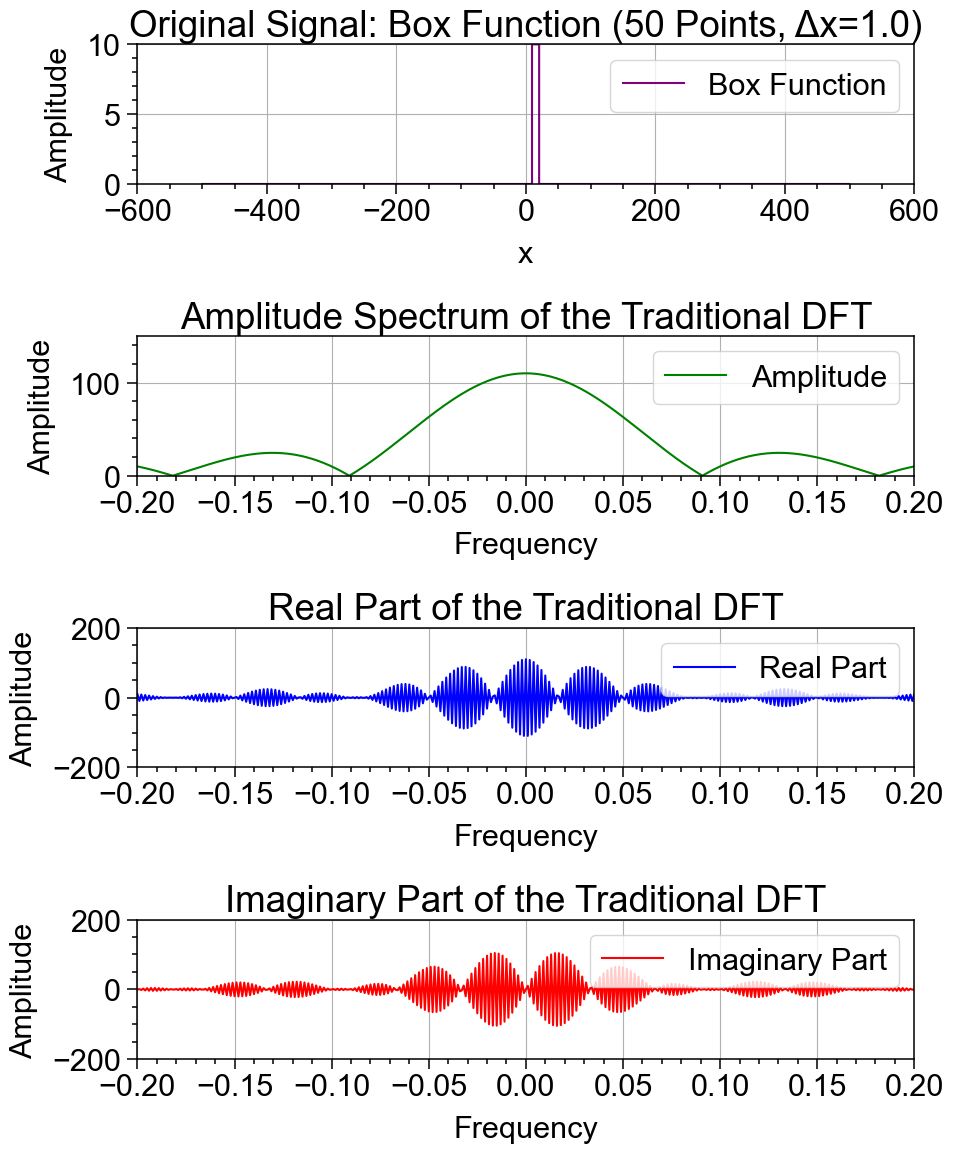

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid with 50 points and a delta x of 1.0
x = np.arange(-500, 500, 1)  # 50 points, delta x = 1.0

# Define the box function
box_width = 10  # Width of the box
box_function = np.where((x >= 10) & (x <= 10 + box_width), 10, 0)  # Box from x=10 to x=20

# Traditional DFT implementation
def dft(signal):
    N = len(signal)
    result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return result

# Perform the traditional DFT on the box function
dft_result = np.fft.fft(box_function)
frequencies = np.fft.fftfreq(len(x), d=(x[1] - x[0]))  # Frequency axis
frequencies_shifted = np.fft.fftshift(frequencies)
dft_result_shifted = np.fft.fftshift(dft_result)

# Extract components
amplitude = np.abs(dft_result_shifted)  # Amplitude spectrum
real_part = np.real(dft_result_shifted)  # Real part
imaginary_part = np.imag(dft_result_shifted)  # Imaginary part

# Limit the frequency axis to [-0.5, 0.5]
freq_mask = (frequencies_shifted >= -0.2) & (frequencies_shifted <= 0.2)
frequencies_limited = frequencies_shifted[freq_mask]
amplitude_limited = amplitude[freq_mask]
real_part_limited = real_part[freq_mask]
imaginary_part_limited = imaginary_part[freq_mask]

# Plot the results
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Subplot 1: Original signal (box function)
axs[0].step(x, box_function, where='mid', color='purple', label="Box Function")
axs[0].set_title("Original Signal: Box Function (50 Points, Δx=1.0)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)
axs[0].legend()

# Subplot 2: Amplitude spectrum (limited to [-0.5, 0.5])
axs[1].plot(frequencies_limited, amplitude_limited, color='green', label="Amplitude")
axs[1].set_title("Amplitude Spectrum of the Traditional DFT")
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Amplitude")
axs[1].grid(True)
axs[1].legend()

# Subplot 3: Real part (limited to [-0.5, 0.5])
axs[2].plot(frequencies_limited, real_part_limited, color='blue', label="Real Part")
axs[2].set_title("Real Part of the Traditional DFT")
axs[2].set_xlabel("Frequency")
axs[2].set_ylabel("Amplitude")
axs[2].grid(True)
axs[2].legend()

# Subplot 4: Imaginary part (limited to [-0.5, 0.5])
axs[3].plot(frequencies_limited, imaginary_part_limited, color='red', label="Imaginary Part")
axs[3].set_title("Imaginary Part of the Traditional DFT")
axs[3].set_xlabel("Frequency")
axs[3].set_ylabel("Amplitude")
axs[3].grid(True)
axs[3].legend()

# Adjust layout and show
plt.tight_layout()
plt.show()
